In [2]:
import tweepy
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
consumer_key = "#####" 
consumer_secret = "#####" 
access_token = "#####" 
access_token_secret = "#####"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

## MichiganCentralStation

-- ran in command line: snscrape twitter-search "#MichiganCentralStation since:2018-06-01 until:2018-07-01" > mcs_tweets.txt

In [5]:
tweet_url = pd.read_csv("mcs_tweets.txt", index_col= None, header = None, names = ["links"])
tweet_url.head()

af = lambda x: x["links"].split("/")[-1]
tweet_url['id'] = tweet_url.apply(af, axis=1)


In [6]:
tweet_url.head()

,links,id
0,https://twitter.com/JeffreyGSmith/status/10130...,1013078323612745728
1,https://twitter.com/Nutopia_tv/status/10130595...,1013059581595938816
2,https://twitter.com/BillVogelCRE/status/101303...,1013031912921817089
3,https://twitter.com/digital_trav/status/101284...,1012842578046222336
4,https://twitter.com/digital_trav/status/101284...,1012842389625622529


In [7]:
ids = tweet_url['id'].tolist()
ids

['1013078323612745728',
 '1013059581595938816',
 '1013031912921817089',
 '1012842578046222336',
 '1012842389625622529',
 '1012841339657117697',
 '1012802982558257153',
 '1012781604878548992',
 '1012738572108083202',
 '1012728108426805248',
 '1012697489382653954',
 '1012584033614745601',
 '1012452859722465280',
 '1309601531977699329',
 '1012426519644426242',
 '1012413976448204801',
 '1012395205759291392',
 '1012389598054543360',
 '1012377442005200896',
 '1012369588288442368',
 '1012368767861641217',
 '1012262213657251845',
 '1012250562128171008',
 '1012128446523367424',
 '1012078799419248640',
 '1012070668551294976',
 '1012059407595630598',
 '1012056939025625088',
 '1012055013655539712',
 '1012042065281028097',
 '1012017747205787649',
 '1011972345882447873',
 '1011959204637216769',
 '1011716748553441283',
 '1011712214158528512',
 '1011678141637644288',
 '1011664477547352064',
 '1011649137559957505',
 '1011604145609084931',
 '1011598724143964160',
 '1011578182015832065',
 '10115667557042

In [8]:
total_count = len(ids)
chunks = (total_count - 1) // 50 + 1

def fetch_tw(ids):
    list_of_tw_status = api.statuses_lookup(ids, tweet_mode= "extended")
    empty_data = pd.DataFrame()
    for status in list_of_tw_status:
            tweet_elem = {"date": status.created_at,
                          "tweet_id":status.id,
                          "tweet":status.full_text,
                          "User location":status.user.location,
                          "User screen name":status.user.screen_name,
                          "User name":status.user.name,
                          "Retweet count":status.retweet_count,
                          "Like count":status.favorite_count,
                          "Source":status.source,
                          "Is quoted?":status.is_quote_status,
                          "Is reply?":status.in_reply_to_status_id,
                          "In reply to user name":status.in_reply_to_screen_name,
                          "Location":status.coordinates,
                          "Place":status.place,
                          "Is quoted?":status.is_quote_status}
                          #"Quoted status":status.quoted_status_id
                          #"Quote count":status.quote_count,
                          #"Reply count":status.reply_count, #might not let me do this w/o premium
                          #"Retweet status":status.retweeted_status}
            empty_data = empty_data.append(tweet_elem, ignore_index = True)
    empty_data.to_csv("hashtagmcs_tweets.csv", mode="a")

for i in range(chunks):
        batch = ids[i*50:(i+1)*50]
        result = fetch_tw(batch)

## Michigan Central Station

-- ran in command line: ran in command line: snscrape twitter-search "Michigan Central Station since:2018-06-01 until:2018-07-01" > michigancentraltweets.txt

In [10]:
tweet_url = pd.read_csv("michigancentraltweets.txt", index_col= None, header = None, names = ["links"])
tweet_url.head()

af = lambda x: x["links"].split("/")[-1]
tweet_url['id'] = tweet_url.apply(af, axis=1)

tweet_url.head()

ids = tweet_url['id'].tolist()
ids

['1013200761499652097',
 '1013176987639271424',
 '1013165444608548864',
 '1013163446446239744',
 '1013127939951661057',
 '1013127920964001792',
 '1013127554746630145',
 '1013116602525421569',
 '1013086775970025474',
 '1013072682982653953',
 '1013043751969673216',
 '1012971225243701248',
 '1012927620726579200',
 '1012889193154949120',
 '1012866721684901890',
 '1012863680290041856',
 '1012863397304643584',
 '1012863358574432257',
 '1012822944806944768',
 '1012806709230886918',
 '1012794319210606592',
 '1012793291253993472',
 '1012788441988231168',
 '1012770938335657984',
 '1012770050669993985',
 '1012749381450248192',
 '1012749254715064321',
 '1012747851007447045',
 '1012736437505134592',
 '1012733426070409219',
 '1012730805431472131',
 '1012729999680557056',
 '1012724899918446592',
 '1012719900920598528',
 '1012712236463415296',
 '1012707127247364099',
 '1012705527153872896',
 '1012699359404683264',
 '1012682531857223681',
 '1012673871437320192',
 '1012670118260854784',
 '10126699332081

In [11]:
total_count = len(ids)
chunks = (total_count - 1) // 50 + 1

def fetch_tw(ids):
    list_of_tw_status = api.statuses_lookup(ids, tweet_mode= "extended")
    empty_data = pd.DataFrame()
    for status in list_of_tw_status:
            tweet_elem = {"date": status.created_at,
                          "tweet_id":status.id,
                          "tweet":status.full_text,
                          "User location":status.user.location,
                          "User screen name":status.user.screen_name,
                          "User name":status.user.name,
                          "Retweet count":status.retweet_count,
                          "Like count":status.favorite_count,
                          "Source":status.source,
                          "Is quoted?":status.is_quote_status,
                          "Is reply?":status.in_reply_to_status_id,
                          "In reply to user name":status.in_reply_to_screen_name,
                          "Location":status.coordinates,
                          "Place":status.place,
                          "Is quoted?":status.is_quote_status}
            empty_data = empty_data.append(tweet_elem, ignore_index = True)
    empty_data.to_csv("michigancentralstation_tweets.csv", mode="a")

for i in range(chunks):
        batch = ids[i*50:(i+1)*50]
        result = fetch_tw(batch)

## #ForDetroit


-- ran in command line: snscrape twitter-search "#fordetroit since:2018-06-01 until:2018-07-01" > fordetroit_tweets.txt

In [3]:
tweet_url = pd.read_csv("fordetroit_tweets.txt", index_col= None, header = None, names = ["links"])
tweet_url.head()

af = lambda x: x["links"].split("/")[-1]
tweet_url['id'] = tweet_url.apply(af, axis=1)

tweet_url.head()

ids = tweet_url['id'].tolist()
ids

['1013059581595938816',
 '1301587465258577920',
 '1012800651481501698',
 '1012788630375583745',
 '1012781604878548992',
 '1012773080756838401',
 '1012768859902959616',
 '1012750464834854913',
 '1012699350194147328',
 '1012691365770219520',
 '1012434415392317441',
 '1012334887351791616',
 '1012313446828986368',
 '1012199243849916416',
 '1012174705040773120',
 '1012122131432460289',
 '1012061182168109056',
 '1012035781890920452',
 '1012015090269327361',
 '1011987060834619393',
 '1011972345882447873',
 '1011941007745847296',
 '1011797837536022529',
 '1011755031438217221',
 '1011706517828063232',
 '1011691511879274505',
 '1011629835175825408',
 '1011616191486545921',
 '1011608957192982530',
 '1011592662250471424',
 '1011578182015832065',
 '1011529822860992512',
 '1011457214337486850',
 '1011438564544901120',
 '1011436669197697024',
 '1011434365933506560',
 '1011430822426107907',
 '1011429525115334656',
 '1011425280542593030',
 '1011409638439489536',
 '1011406607325057027',
 '10114058727932

In [4]:
total_count = len(ids)
chunks = (total_count - 1) // 50 + 1

def fetch_tw(ids):
    list_of_tw_status = api.statuses_lookup(ids, tweet_mode= "extended")
    empty_data = pd.DataFrame()
    for status in list_of_tw_status:
            tweet_elem = {"date": status.created_at,
                          "tweet_id":status.id,
                          "tweet":status.full_text,
                          "User location":status.user.location,
                          "User screen name":status.user.screen_name,
                          "User name":status.user.name,
                          "Retweet count":status.retweet_count,
                          "Like count":status.favorite_count,
                          "Source":status.source,
                          "Is quoted?":status.is_quote_status,
                          "Is reply?":status.in_reply_to_status_id,
                          "In reply to user name":status.in_reply_to_screen_name,
                          "Location":status.coordinates,
                          "Place":status.place,
                          "Is quoted?":status.is_quote_status}
            empty_data = empty_data.append(tweet_elem, ignore_index = True)
    empty_data.to_csv("fordetroit_tweets.csv", mode="a")

for i in range(chunks):
        batch = ids[i*50:(i+1)*50]
        result = fetch_tw(batch)

## read in CSVs

In [3]:
hashmichcentral = pd.read_csv('hashtagmcs_tweets.csv')
michcentral = pd.read_csv('michigancentralstation_tweets.csv')
fordetroit = pd.read_csv('fordetroit_tweets.csv')

In [4]:
hashmichcentral.head()

,Unnamed: 0,In reply to user name,Is quoted?,Is reply?,Like count,Location,Place,Retweet count,Source,User location,User name,User screen name,date,tweet,tweet_id
0,0.0,NaN,1.0,NaN,7.0,NaN,NaN,0.0,Twitter Web Client,"Michigan, USA",STATE CHAMPS! RoboZone,RoboZoneShow,2018-06-28 16:18:13,Wonder how many @FRCTeams alumni will be worki...,1.0123695882884424e+18
1,1.0,Ford,0.0,NaN,0.0,NaN,NaN,0.0,Twitter Web Client,"Detroit, MI",WXYZ Detroit,wxyzdetroit,2018-06-28 17:37:44,"@Ford has assembled a ""wish list"" of stolen #m...",1.0123895980545434e+18
2,2.0,NaN,0.0,NaN,2.0,NaN,NaN,2.0,Twitter Web Client,"Ann Arbor, MI",GMTA,GMTA_US,2018-06-27 19:35:52,#Ford will redevelop the #MichiganCentralStati...,1.0120569390256251e+18
3,3.0,NaN,0.0,NaN,0.0,NaN,NaN,1.0,Twitter Web App,NaN,Izzyyyy🖤🤍💜,SilentxTime,2018-06-26 00:04:00,Whether it is a #detroitbecomehuman reference ...,1.0113996434465669e+18
4,4.0,NaN,0.0,NaN,4.0,NaN,NaN,0.0,Twitter Web Client,Internet,Rox-Anne Henderson,celebr8thislife,2018-06-25 19:07:30,Sharing a tour of the #michigancentralstation ...,1.0113250252725944e+18


In [5]:
michcentral.head()

,Unnamed: 0,In reply to user name,Is quoted?,Is reply?,Like count,Location,Place,Retweet count,Source,User location,User name,User screen name,date,tweet,tweet_id
0,0.0,NaN,0.0,NaN,5.0,NaN,NaN,0.0,Hootsuite,"Los Angeles, CA",Esotouric's Secret Los Angeles,esotouric,2018-06-29 16:35:57,"Blessed are the architectural salvagers, who t...",1.0127364375051346e+18
1,1.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,Hootsuite Inc.,"Randolph, NJ",Performance LF,PerformanceLF,2018-06-29 21:15:11,"DETROIT: COMEBACK CITY, WHICH HIGHLIGHTS DETRO...",1.0128067092308869e+18
2,2.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,Facebook,Michigan,One Cork Or Cap At A Time,OneCorkAtATime,2018-06-29 14:08:36,Went to the abandoned but recently acquired by...,1.0126993594046833e+18
3,3.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,dlvr.it,Metro Detroit,Ivey Group,GoIveyGroup,2018-06-28 20:28:06,Do you have any items from Michigan Central St...,1.0124324732701164e+18
4,4.0,NaN,0.0,NaN,1.0,NaN,NaN,0.0,Twitter Web Client,Canada,Solomon Walker,solomonwalker,2018-06-29 20:25:57,Detroit’s long-abandoned Michigan Central Stat...,1.0127943192106066e+18


In [6]:
fordetroit.head()

,Unnamed: 0,In reply to user name,Is quoted?,Is reply?,Like count,Location,Place,Retweet count,Source,User location,User name,User screen name,date,tweet,tweet_id
0,0.0,NaN,0.0,NaN,1.0,NaN,NaN,0.0,Twitter for iPhone,"Detroit, Michigan",Rose Tokatlian,SailorRose1,2018-06-29 18:44:47,Train station History channel documentary airs...,1.0127688599029596e+18
1,1.0,NaN,0.0,NaN,1.0,NaN,Place(_api=<tweepy.api.API object at 0x117d22a...,0.0,Twitter for iPhone,"Detroit, Michigan",Cyndee Harrison,MIX_Cyndee,2018-06-26 02:31:08,#ForDetroit https://t.co/3n11hnLC4m,1.011436669197697e+18
2,2.0,NaN,0.0,NaN,0.0,NaN,NaN,1.0,Facebook,"Farmington Hills, MI",Ivette Aguilar,ivettepisho,2018-06-26 02:38:40,#Fordetroit otro dia de rol 😎 — attending Mich...,1.0114385645449011e+18
3,3.0,NaN,0.0,NaN,4.0,NaN,NaN,0.0,Twitter Web Client,Internet,Rox-Anne Henderson,celebr8thislife,2018-06-25 19:07:30,Sharing a tour of the #michigancentralstation ...,1.0113250252725944e+18
4,4.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,Twitter for iPhone,Phoenix,jennifer leslie,jenniferaleslie,2018-06-26 14:24:29,Thank you @Ford What a surreal experience! Loo...,1.0116161914865459e+18


In [198]:
df = hashmichcentral.append([michcentral, fordetroit])

In [199]:
df.describe()

,Unnamed: 0
count,3317.000000
mean,24.320772
std,14.383435
min,0.000000
25%,12.000000
50%,24.000000
75%,37.000000
max,49.000000


In [200]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [201]:
## remove duplicates
df.drop_duplicates(keep='first', inplace=True)
len(df['tweet'])

3053

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3053 entries, 0 to 962
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   In reply to user name  163 non-null    object
 1   Is quoted?             3053 non-null   object
 2   Is reply?              92 non-null     object
 3   Like count             3053 non-null   object
 4   Location               56 non-null     object
 5   Place                  255 non-null    object
 6   Retweet count          3053 non-null   object
 7   Source                 3053 non-null   object
 8   User location          2603 non-null   object
 9   User name              3052 non-null   object
 10  User screen name       3053 non-null   object
 11  date                   3053 non-null   object
 12  tweet                  3053 non-null   object
 13  tweet_id               3053 non-null   object
dtypes: object(14)
memory usage: 357.8+ KB


In [206]:
# came across an error, checking for instances
df.loc[df['Location'] == 'Location']

,In reply to user name,Is quoted?,Is reply?,Like count,Location,Place,Retweet count,Source,User location,User name,User screen name,date,tweet,tweet_id
50,In reply to user name,Is quoted?,Is reply?,Like count,Location,Place,Retweet count,Source,User location,User name,User screen name,date,tweet,tweet_id


In [207]:
#dropping row
df = df.drop([50])

In [208]:
#convert date to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

In [209]:
df['day'] = [d.date() for d in df['date']]
df['day'] = pd.to_datetime(df['day'], errors='coerce', format='%Y-%m-%d ')

In [211]:
#check conversion to datetime for any dates that aren't from June 2018
df['day'].unique()

array(['2018-06-28T00:00:00.000000000', '2018-06-27T00:00:00.000000000',
       '2018-06-26T00:00:00.000000000', '2018-06-25T00:00:00.000000000',
       '2018-06-29T00:00:00.000000000', '2018-06-30T00:00:00.000000000',
       '2020-09-25T00:00:00.000000000', '2018-06-24T00:00:00.000000000',
       '2018-06-23T00:00:00.000000000', '2018-06-22T00:00:00.000000000',
       '2018-06-21T00:00:00.000000000', '2020-09-03T00:00:00.000000000',
       '2018-06-20T00:00:00.000000000', '2018-06-19T00:00:00.000000000',
       '2018-06-18T00:00:00.000000000', '2018-06-15T00:00:00.000000000',
       '2018-06-13T00:00:00.000000000', '2018-06-17T00:00:00.000000000',
       '2018-06-14T00:00:00.000000000', '2018-06-16T00:00:00.000000000',
       '2018-06-12T00:00:00.000000000', '2018-06-03T00:00:00.000000000',
       '2018-06-11T00:00:00.000000000', '2018-06-10T00:00:00.000000000',
       '2018-06-04T00:00:00.000000000', '2018-06-07T00:00:00.000000000',
       '2018-06-05T00:00:00.000000000', '2018-06-02

In [212]:
# examine incorrect dates
start_date = '2018-08-01'
end_date = '2021-01-01'
mask = (df['date'] > start_date) & (df['date'] <= end_date)
df.loc[mask]

,In reply to user name,Is quoted?,Is reply?,Like count,Location,Place,Retweet count,Source,User location,User name,User screen name,date,tweet,tweet_id,day
37,NaN,0.0,NaN,159.0,NaN,NaN,32.0,Twitter for Advertisers (legacy),"Washington, DC",PhRMA,PhRMA,2020-09-25 21:11:51,The world’s most rigorous clinical trials mean...,1.3096015319776993e+18,2020-09-25
128,NaN,0.0,NaN,5095.0,NaN,NaN,329.0,Twitter for Advertisers (legacy),"Morrisville, NC",Lenovo Legion,LenovoLegion,2020-09-03 18:26:48,Lenovo Legion x @PlayApex\nNow is your chance ...,1.301587465258578e+18,2020-09-03
314,NaN,0.0,NaN,131.0,NaN,NaN,15.0,Twitter for Advertisers (legacy),"Washington, DC",PhRMA,PhRMA,2020-09-25 21:11:59,"When the stakes are this big, you need the bes...",1.3096015676460605e+18,2020-09-25
2568,NaN,0.0,NaN,0.0,NaN,NaN,0.0,Twitter for Advertisers (legacy),"Minnetonka, MN",UnitedHealth Group,UnitedHealthGrp,2020-11-17 14:27:55,Learn how to achieve universal coverage by str...,1.3287064383786967e+18,2020-11-17
2791,NaN,0.0,NaN,17.0,NaN,NaN,5.0,SocialNewsDesk,"USA TODAY HQ, McLean, Va.",USA TODAY,USATODAY,2020-10-29 15:22:00,Here are 7 ways to make cooking weeknight dinn...,1.321834677112578e+18,2020-10-29


In [213]:
# drop error rows
df = df.loc[~mask]

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 0 to 3052
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   In reply to user name  162 non-null    object        
 1   Is quoted?             3047 non-null   object        
 2   Is reply?              91 non-null     object        
 3   Like count             3047 non-null   object        
 4   Location               55 non-null     object        
 5   Place                  254 non-null    object        
 6   Retweet count          3047 non-null   object        
 7   Source                 3047 non-null   object        
 8   User location          2597 non-null   object        
 9   User name              3046 non-null   object        
 10  User screen name       3047 non-null   object        
 11  date                   3047 non-null   datetime64[ns]
 12  tweet                  3047 non-null   object        
 13  twe

In [215]:
df['Like count'] = pd.to_numeric(df['Like count'])
df['Retweet count'] = pd.to_numeric(df['Retweet count'])

In [237]:
#reset index
df.reset_index(inplace=True)

In [239]:
df.drop(columns=['index'], inplace=True)
df.tail()

,In reply to user name,Is quoted?,Is reply?,Like count,Location,Place,Retweet count,Source,User location,User name,User screen name,date,tweet,tweet_id,day,cleaned,label,tokenized_sents
3042,NaN,0.0,NaN,20.0,NaN,NaN,4.0,Twitter Web Client,"Cherry Hill Village, MI",Karl Henkel,karlhenk,2018-06-15 22:17:38,"An old @Ford pickup, a kiss, the train station...",1.007748997115732e+18,2018-06-15,an old pickup a kiss the train station st...,1.0,"[old, pickup, kiss, train, station, story, beh..."
3043,NaN,0.0,NaN,0.0,NaN,NaN,0.0,The Tweeted Times,Canada,Commodity Rentals,commodityrental,2018-06-17 23:04:45,Top story: #fordetroit https://t.co/LXtVAPJt5F...,1.008485630005973e+18,2018-06-17,top story fordetroit see more,1.0,"[top, story, fordetroit, see]"
3044,NaN,0.0,NaN,1.0,NaN,NaN,0.0,Twitter for iPhone,"Detroit & Ann Arbor, MI",Mark Rust,MarkJRust,2018-06-16 15:06:24,Let's go! @Ford #ForDetroit #Ford https://t.co...,1.0080028612031078e+18,2018-06-16,let s go fordetroit ford,1.0,"[let, go, fordetroit, ford]"
3045,NaN,0.0,NaN,409.0,NaN,NaN,123.0,Twitter Web Client,"Dearborn, MI",Ford Motor Company,Ford,2018-06-15 12:13:47,"“We hope for better things, it will rise from ...",1.0075970326332252e+18,2018-06-15,we hope for better things it will rise from ...,-1.0,"[hope, better, things, rise, ashes, look, futu..."
3046,NaN,0.0,NaN,577.0,NaN,NaN,159.0,Twitter Web Client,"Dearborn, MI",Ford Motor Company,Ford,2018-06-16 02:30:22,"Two rich histories, one future— a better tomor...",1.007812598207828e+18,2018-06-16,two rich histories one future a better tomor...,1.0,"[two, rich, histories, one, future, better, to..."


# Classify sentiment

In [240]:
import re
from textblob import TextBlob
from flair.models import TextClassifier
from flair.data import Sentence


In [241]:
df['cleaned'] = df['tweet'].str.lower()
df['cleaned'] = df['cleaned'].str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", regex=True)

In [242]:
#flair sentiment classification

classifier = TextClassifier.load('en-sentiment')

df['label'] = np.nan

for i in range(len(df['cleaned'])):
    sent_flair = Sentence(df['cleaned'].iloc[i])
    if len(sent_flair)==0:
        continue
    else:
        classifier.predict(sent_flair)
        label = sent_flair.labels[0]
        flair_label = sent_flair.labels[0].to_dict()['value']
        if (flair_label=='NEGATIVE'):
            df['label'].iloc[i] = -1
        else:
            df['label'].iloc[i] = 1

2020-12-10 19:40:53,935 loading file /Users/regan/.flair/models/sentiment-en-mix-distillbert_3.1.pt


/Users/regan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [244]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
import pandas as pd
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

In [245]:
# tokenize sentences
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['cleaned']), axis=1)

In [246]:
# remove stop words 
stop_words = set(stopwords.words('english'))
df['tokenized_sents'] = df['tokenized_sents'].apply(lambda row: [w for w in row if w not in stop_words])

# EDA

In [248]:
#create word cloud 
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS) 
comment_words = ''

# iterate through the text
for val in df.cleaned: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1400, height = 800, background_color ='white', 
                      stopwords = stopwords).generate(comment_words)

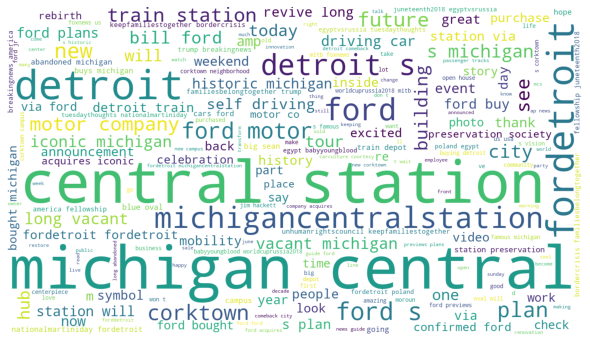

In [249]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

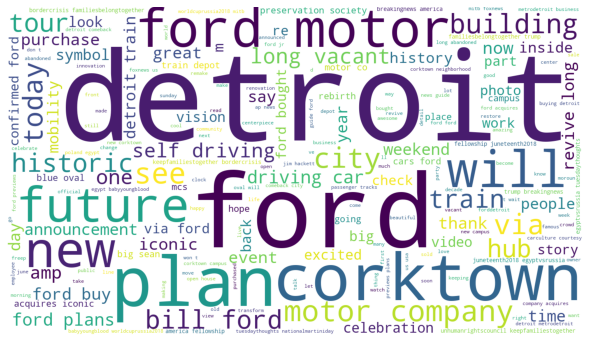

In [262]:
# remove some common words from wordcloud

stopwords.add('michigan')
stopwords.add('central')
stopwords.add('station')
stopwords.add('fordetroit')
stopwords.add('michigancentralstation')
stopwords.add('s')

wordcloud = WordCloud(width = 1400, height = 800, background_color ='white', 
                      stopwords = stopwords).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [289]:
# unique users 

unique_users = set(df['User screen name'])
print(len(unique_users))

1662


In [250]:
df.head()

,In reply to user name,Is quoted?,Is reply?,Like count,Location,Place,Retweet count,Source,User location,User name,User screen name,date,tweet,tweet_id,cleaned,label,tokenized_sents
0,NaN,1.0,NaN,7.0,NaN,NaN,0.0,Twitter Web Client,"Michigan, USA",STATE CHAMPS! RoboZone,RoboZoneShow,2018-06-28 16:18:13,Wonder how many @FRCTeams alumni will be worki...,1.0123695882884424e+18,wonder how many alumni will be working at th...,1.0,"[wonder, many, alumni, working, proposed, auto..."
1,Ford,0.0,NaN,0.0,NaN,NaN,0.0,Twitter Web Client,"Detroit, MI",WXYZ Detroit,wxyzdetroit,2018-06-28 17:37:44,"@Ford has assembled a ""wish list"" of stolen #m...",1.0123895980545434e+18,has assembled a wish list of stolen michi...,-1.0,"[assembled, wish, list, stolen, michigancentra..."
2,NaN,0.0,NaN,2.0,NaN,NaN,2.0,Twitter Web Client,"Ann Arbor, MI",GMTA,GMTA_US,2018-06-27 19:35:52,#Ford will redevelop the #MichiganCentralStati...,1.0120569390256251e+18,ford will redevelop the michigancentralstati...,1.0,"[ford, redevelop, michigancentralstation, make..."
3,NaN,0.0,NaN,0.0,NaN,NaN,1.0,Twitter Web App,NaN,Izzyyyy🖤🤍💜,SilentxTime,2018-06-26 00:04:00,Whether it is a #detroitbecomehuman reference ...,1.0113996434465669e+18,whether it is a detroitbecomehuman reference ...,-1.0,"[whether, detroitbecomehuman, reference, unkno..."
4,NaN,0.0,NaN,4.0,NaN,NaN,0.0,Twitter Web Client,Internet,Rox-Anne Henderson,celebr8thislife,2018-06-25 19:07:30,Sharing a tour of the #michigancentralstation ...,1.0113250252725944e+18,sharing a tour of the michigancentralstation ...,1.0,"[sharing, tour, michigancentralstation, today,..."


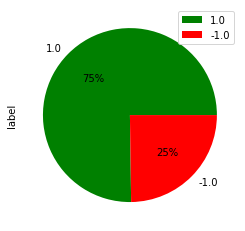

In [263]:
import matplotlib.pyplot as plt

# plot positive and negative sentiments
df.label.value_counts().plot(kind='pie', autopct='%1.0f%%',colors=['green','red'])
plt.legend();

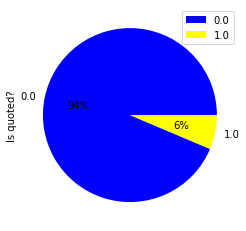

In [264]:
# quoted tweets

_ = df['Is quoted?'].value_counts().plot(kind='pie', autopct='%1.0f%%',colors=['blue','yellow']);
_ = plt.legend();

# Like count

count    3047.000000
mean        7.232688
std        38.037468
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       826.000000
Name: Like count, dtype: float64


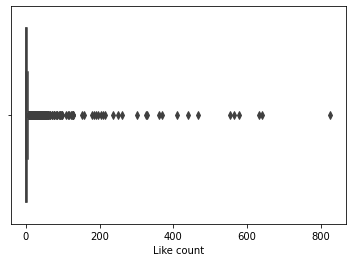

In [265]:
# Like count
print(df['Like count'].describe())
sns.boxplot(x='Like count', hue='label', data=df);

In [266]:
# looking at the tweet with the most likes
df.loc[df['Like count'] == 826]

,In reply to user name,Is quoted?,Is reply?,Like count,Location,Place,Retweet count,Source,User location,User name,User screen name,date,tweet,tweet_id,day,cleaned,label,tokenized_sents
2995,NaN,0.0,NaN,826.0,NaN,NaN,313.0,Twitter Web Client,"Dearborn, MI",Ford Motor Company,Ford,2018-06-19 03:25:29,"A city of dreams, a community of heart and a f...",1.0089136324224819e+18,2018-06-19,a city of dreams a community of heart and a f...,1.0,"[city, dreams, community, heart, future, promi..."


In [268]:
# tweet text of most liked tweet
df['tweet'].iloc[2995]

'A city of dreams, a community of heart and a future of promise. 6.19.18 #fordetroit. https://t.co/7S1HH6MRzp'

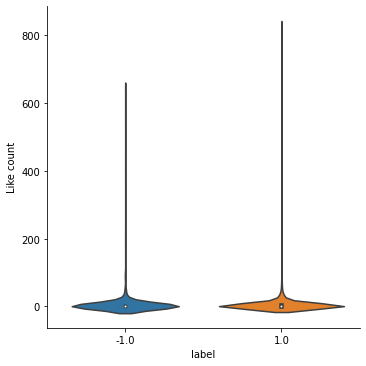

In [282]:
sns.catplot(x="label", y='Like count', data=df, kind='violin');

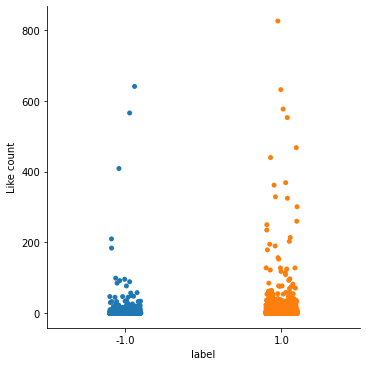

In [284]:
sns.catplot(x='label', y='Like count', data=df);

# Retweet count

In [290]:
df['Retweet count'].describe()

count    3047.000000
mean        2.152609
std        12.670894
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       313.000000
Name: Retweet count, dtype: float64

In [291]:
# looking at the tweet with the most likes
df.loc[df['Retweet count'] == 313]

,In reply to user name,Is quoted?,Is reply?,Like count,Location,Place,Retweet count,Source,User location,User name,User screen name,date,tweet,tweet_id,day,cleaned,label,tokenized_sents
2995,NaN,0.0,NaN,826.0,NaN,NaN,313.0,Twitter Web Client,"Dearborn, MI",Ford Motor Company,Ford,2018-06-19 03:25:29,"A city of dreams, a community of heart and a f...",1.0089136324224819e+18,2018-06-19,a city of dreams a community of heart and a f...,1.0,"[city, dreams, community, heart, future, promi..."


In [292]:
df['tweet'].iloc[2995]

'A city of dreams, a community of heart and a future of promise. 6.19.18 #fordetroit. https://t.co/7S1HH6MRzp'

The most retweeted tweet is the same as the most liked

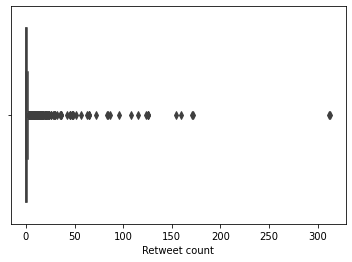

In [278]:
_ = sns.boxplot(x='Retweet count', data=df)

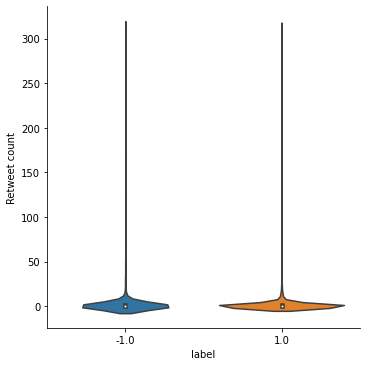

In [280]:
sns.catplot(x="label", y='Retweet count', data=df, kind='violin');

/Users/regan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


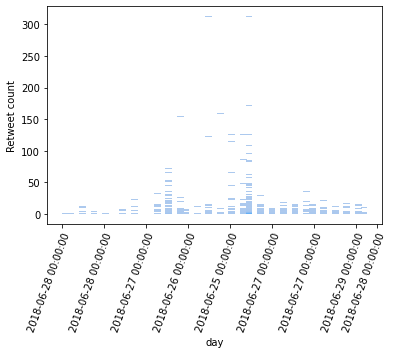

In [269]:
# count of retweets by date

ax = sns.histplot(x='day',y='Retweet count', data=df);
ax.set_xticklabels(labels=df.day, rotation=70, rotation_mode="anchor", ha="right");

# Tweets by day

In [299]:
df.groupby('day').agg(['mean','count'])

Like count       Retweet count           label      
                 mean count          mean count      mean count
day                                                            
2018-06-01   0.000000     1      0.000000     1  1.000000     1
2018-06-02   0.000000     2      0.000000     2  0.000000     2
2018-06-03  10.600000     5      5.200000     5  0.200000     5
2018-06-04   3.750000     4      1.250000     4  0.000000     4
2018-06-05   2.250000     4      0.250000     4  1.000000     4
2018-06-07   7.250000     4      3.000000     4 -0.500000     4
2018-06-08  15.500000     8      5.750000     8 -0.500000     8
2018-06-10   8.000000    20      4.150000    20  0.500000    20
2018-06-11   5.390769   325      2.104615   325  0.255385   325
2018-06-12  10.811881   101      2.633663   101  0.227723   101
2018-06-13   1.875000    24      0.666667    24  0.250000    24
2018-06-14   2.888889    18      0.888889    18  0.333333    18
2018-06-15  33.500000    36     13.472222    36  0.500000    36
2018-06-16  35.555556    18      9.555556    18  0.666667    18
2018-06-17   9.294416   197      2.741117   197  0.238579   197
2018-06-18   8.436047   172      2.412791   172  0.337209   172
2018-06-19   9.622587  1036      2.767375  1036  0.681467  1036
2018-06-20   2.669118   272      0.768382   272  0.397059   272
2018-06-21   2.431193   109      0.614679   109  0.559633   109
2018-06-22   7.588235   102      1.245098   102  0.686275   102
2018-06-23   3.263158   114      0.763158   114  0.403509   114
2018-06-24   3.457143   140      0.814286   140  0.628571   140
2018-06-25   2.025641   117      0.606838   117  0.606838   117
2018-06-26   3.881356    59      1.152542    59  0.762712    59
2018-06-27   2.850000    40      1.150000    40  0.600000    40
2018-06-28   3.425926    54      1.148148    54  0.185185    54
2018-06-29   4.113636    44      1.340909    44  0.681818    44
2018-06-30   2.047619    21      0.714286    21  0.714286    21

In [ ]:
week_groups = data.groupby([data['date_year'],data['date_week']]
                          )['value'].count()
week_groups.plot(kind='bar',figsize=(10,5),legend=None)

In [320]:
grouped_day = df.groupby(df['day'])['cleaned'].count()

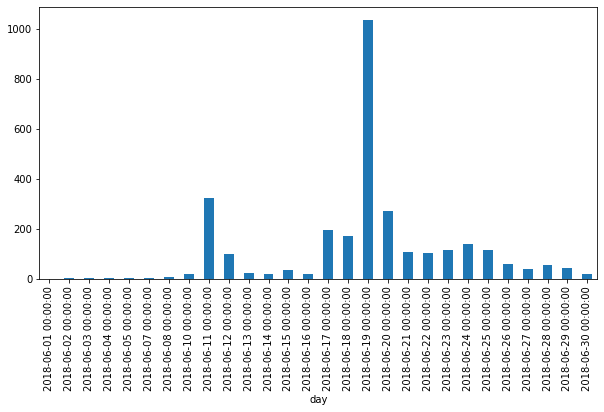

In [321]:
grouped_day.plot(kind='bar',figsize=(10,5),legend=None);

In [328]:
grouped_label = df.groupby(['day','label']).agg(['mean','count'])

In [329]:
grouped_label.head()

Like count       Retweet count      
                       mean count          mean count
day        label                                     
2018-06-01  1.0    0.000000     1      0.000000     1
2018-06-02 -1.0    0.000000     1      0.000000     1
            1.0    0.000000     1      0.000000     1
2018-06-03 -1.0    2.000000     2      0.500000     2
            1.0   16.333333     3      8.333333     3

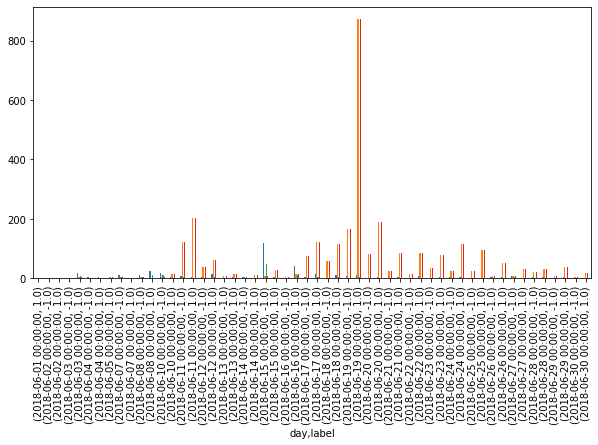

In [331]:
grouped_label.plot(kind='bar',figsize=(10,5),legend=None);

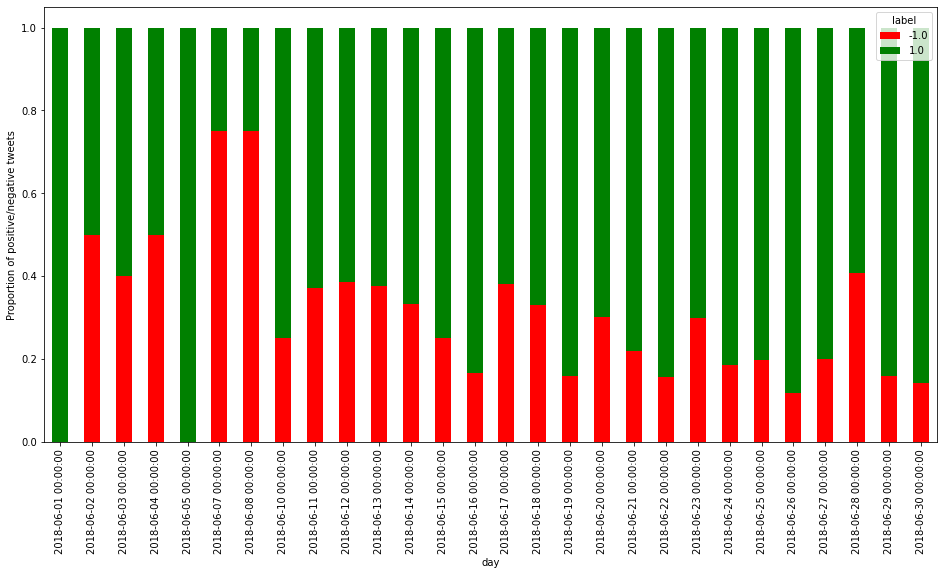

In [372]:
#proportion of positive and negative tweets by day
gr_lab = df.groupby(['day','label'])['label'].count().unstack()
percents_lab = gr_lab.T.div(gr_lab.T.sum()).T

fig,ax = plt.subplots(figsize = (16, 8))

percents_lab.plot(kind='bar', stacked=True, ax=ax, color=['red','green'])
ax.set_xlabel('day')
ax.set_ylabel('Proportion of positive/negative tweets');

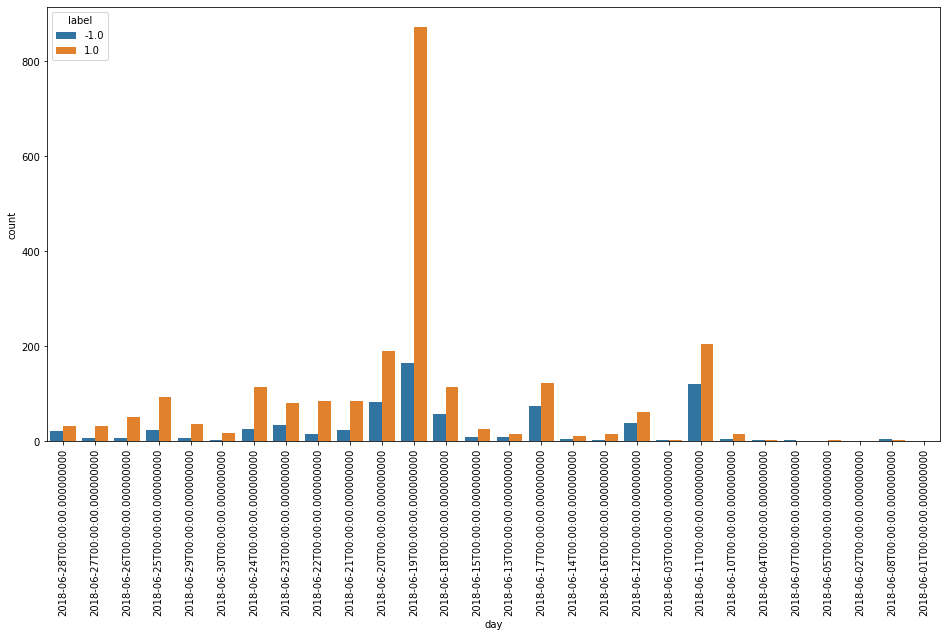

In [374]:
plt.figure(figsize = (16, 8), facecolor = None) 
sns.countplot(data=df, x='day',hue='label')
plt.xticks(rotation=90);